### Student Information
Name: Kaltun Mustafe Mohamed

Student ID:611421418

GitHub ID:Kalthuma007

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [32]:
### Begin Assignment Here

In [33]:
# Phase 1 - Exercise 1: Import necessary libraries
# --- SSL fix for Mac when downloading datasets ---
import ssl
import certifi
ssl._create_default_https_context = lambda: ssl.create_default_context(cafile=certifi.where())

# --- Standard libraries ---
import pandas as pd
import numpy as np
import math
import nltk

# Download necessary NLTK datasets
nltk.download('punkt')

# --- Scikit-learn and data ---
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer

# --- Plotting and visualization ---
import plotly as py

# --- Additional libraries ---
# If you get "ModuleNotFoundError: No module named 'PAMI'" run in a new cell:
# !pip install PAMI
import PAMI
import umap




[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kaltunmustafemohamed/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [34]:
# phase 1 Exercise 2--- Load and prepare dataset ---

# Load the CSV dataset
df = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")

# Keep only the columns needed for sentiment analysis
df = df[['text', 'label']]

# Rename columns for clarity
df.columns = ['Text', 'Sentiment']

# Display the first 5 records to check
df.head()



,Text,Sentiment
0,Calls on retards,-1.0
1,Stunt as in like why did they even make a big ...,0.0
2,Seeing lots of red in the ticker.,0.0
3,Vision Marine Technologies Inc. is rewriting t...,1.0
4,He didn’t say thank you.,-1.0


In [35]:
# Phase 1 - Exercise 3: Inspect data
print("Dataset shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nUnique sentiment values:", df['Sentiment'].unique())

# Display basic statistics
df.describe()

Dataset shape: (847, 2)

Data types:
 Text          object
Sentiment    float64
dtype: object

Unique sentiment values: [-1.  0.  1.]


,Sentiment
count,847.000000
mean,-0.243211
std,0.664801
min,-1.000000
25%,-1.000000
50%,0.000000
75%,0.000000
max,1.000000


In [36]:
# Phase 1 - Exercise 4: Check for missing values
print(df.isnull().sum())

# Drop rows with missing values if any
df = df.dropna()
print("After dropping missing values, shape:", df.shape)

Text         0
Sentiment    0
dtype: int64
After dropping missing values, shape: (847, 2)


In [37]:
# Phase 1 - Exercise 5: Check for duplicate rows
print("Duplicate rows:", df.duplicated().sum())

# Drop duplicates
df = df.drop_duplicates()
print("After dropping duplicates, shape:", df.shape)


Duplicate rows: 23
After dropping duplicates, shape: (824, 2)


In [38]:
# Phase 1 - Exercise 6: Random sample of 10 records
sample_df = df.sample(10, random_state=42)
sample_df


,Text,Sentiment
623,Trump is using “Art of the Deal” tactics. \n\...,0.0
175,So this is my fun portfolio atm\n\nRKLB - 42%\...,1.0
68,Believe it or not calls and puts,0.0
169,Just stumbled upon some exciting news about St...,1.0
276,"His sneakers, guitars, and cyrpto (i am not na...",0.0
336,"China: ""We are going to build our future on sc...",1.0
831,Things will get better soon. Once those 9 tran...,1.0
87,You need to stop listening to the noise and th...,0.0
687,Trump inherited millions of dollars and is dum...,-1.0
733,"/\n\nMasterful gambit, Mr. Bessent",0.0


In [39]:
# Query every 10th record for positive sentiment
# This is similar to the "sci.med" example in Lab 1

positive_df = df[df['Sentiment'] == 1.0]  # Filter positive sentiment
every_10th = positive_df.iloc[::10]       # Take every 10th record
every_10th.head(5)                         # Show first 5 records

,Text,Sentiment
3,Vision Marine Technologies Inc. is rewriting t...,1.0
81,The cost of this was SPY going -20%. I’ll take...,1.0
169,Just stumbled upon some exciting news about St...,1.0
250,"Hey everyone, i was looking into a new company...",1.0
331,"ELVA is the future, imagine going to any resta...",1.0


In [40]:
# Phase 1 - Exercise 7: Example of feature creation
# Create a column for text length
df['Text_Length'] = df['Text'].apply(len)

# Check first 5 rows
df.head()


,Text,Sentiment,Text_Length
0,Calls on retards,-1.0,16
1,Stunt as in like why did they even make a big ...,0.0,137
2,Seeing lots of red in the ticker.,0.0,33
3,Vision Marine Technologies Inc. is rewriting t...,1.0,1067
4,He didn’t say thank you.,-1.0,24


In [41]:
# Phase 1 - Exercise 8: Selecting relevant features
features = df[['Text', 'Text_Length']]
target = df['Sentiment']

features.head()


,Text,Text_Length
0,Calls on retards,16
1,Stunt as in like why did they even make a big ...,137
2,Seeing lots of red in the ticker.,33
3,Vision Marine Technologies Inc. is rewriting t...,1067
4,He didn’t say thank you.,24


In [42]:
# Phase 1 - Exercise 9: Transform text to lowercase
df['Text'] = df['Text'].str.lower()
df.head()


,Text,Sentiment,Text_Length
0,calls on retards,-1.0,16
1,stunt as in like why did they even make a big ...,0.0,137
2,seeing lots of red in the ticker.,0.0,33
3,vision marine technologies inc. is rewriting t...,1.0,1067
4,he didn’t say thank you.,-1.0,24


In [43]:
# Phase 1 - Exercise 10: Tokenize text using NLTK
from nltk.tokenize import word_tokenize

df['Tokens'] = df['Text'].apply(word_tokenize)
df.head()


,Text,Sentiment,Text_Length,Tokens
0,calls on retards,-1.0,16,"[calls, on, retards]"
1,stunt as in like why did they even make a big ...,0.0,137,"[stunt, as, in, like, why, did, they, even, ma..."
2,seeing lots of red in the ticker.,0.0,33,"[seeing, lots, of, red, in, the, ticker, .]"
3,vision marine technologies inc. is rewriting t...,1.0,1067,"[vision, marine, technologies, inc., is, rewri..."
4,he didn’t say thank you.,-1.0,24,"[he, didn, ’, t, say, thank, you, .]"


In [44]:
# Phase 1 - Exercise 11: Convert text to numerical features
vectorizer = CountVectorizer()
X_counts = vectorizer.fit_transform(df['Text'])

print("Shape of document-term matrix:", X_counts.shape)


Shape of document-term matrix: (824, 4346)


In [45]:
# Phase 1 - Exercise 12: Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_counts, df['Sentiment'], test_size=0.2, random_state=42
)
print("Train set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Train set shape: (659, 4346)
Test set shape: (165, 4346)


In [46]:
# Phase 1 - Exercise 13: Simple statistics
print("Most common sentiment:", df['Sentiment'].mode()[0])
print("Average text length:", df['Text_Length'].mean())


Most common sentiment: 0.0
Average text length: 146.99635922330097


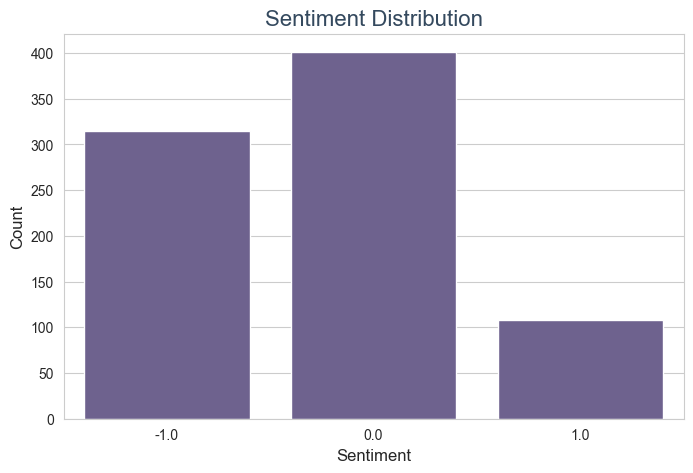

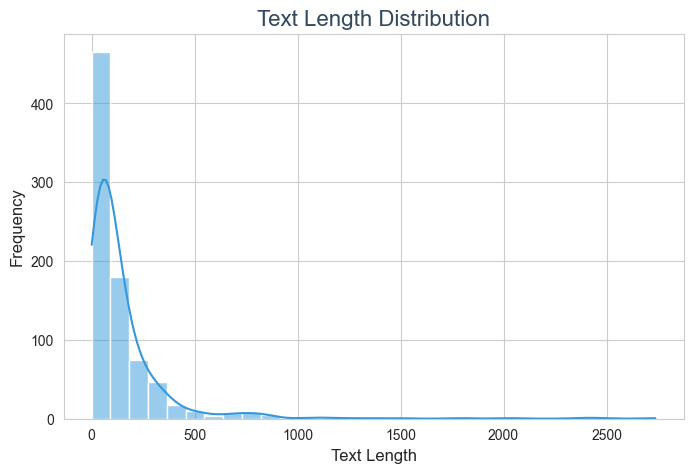

In [49]:
# Phase 1 - Exercise 14: Visualize sentiment distribution with colors

# Set Seaborn style
sns.set_style("whitegrid")

# --- Sentiment Distribution ---
plt.figure(figsize=(8,5))
sns.countplot(
    x='Sentiment', 
    data=df, 
    color='#6B5B95'  # Single color to avoid the palette warning
)
plt.title('Sentiment Distribution', fontsize=16, color='#34495E')
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# --- Text Length Distribution ---
plt.figure(figsize=(8,5))
sns.histplot(
    df['Text_Length'], 
    bins=30, 
    color='#3498DB', 
    kde=True  # optional: adds density curve
)
plt.title('Text Length Distribution', fontsize=16, color='#34495E')
plt.xlabel('Text Length', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


In [50]:
# Phase 1 - Exercise 15: Save cleaned dataset
df.to_csv("Reddit-stock-sentiment-cleaned.csv", index=False)
print("Cleaned dataset saved")


Cleaned dataset saved


# Phase 2

In [ ]:
### Begin Assignment Here